# COSE474-2024F Deep Learning HW 1
- **Chapter 5**
- 2021170964 박경빈

## 0.1. Installation


In [10]:
!pip install d2l==1.0.3



---



## 5.1. Multilayer Perceptrons

In [11]:
%matplotlib inline
import torch
from d2l import torch as d2l

### 5.1.1. Hidden Layers

### 5.1.1.1. Limitations of Linear Models

### 5.1.1.2. Incorporating Hidden Layers

![An MLP with a hidden layer of five hidden units.](http://d2l.ai/_images/mlp.svg)

### 5.1.1.3. From Linear to Nonlinear

As before, we denote by the matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$
a minibatch of $n$ examples where each example has $d$ inputs (features).
For a one-hidden-layer MLP whose hidden layer has $h$ hidden units,
we denote by $\mathbf{H} \in \mathbb{R}^{n \times h}$
the outputs of the hidden layer, which are
*hidden representations*.
Since the hidden and output layers are both fully connected,
we have hidden-layer weights $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$ and biases $\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$
and output-layer weights $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$ and biases $\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$.
This allows us to calculate the outputs $\mathbf{O} \in \mathbb{R}^{n \times q}$
of the one-hidden-layer MLP as follows:

$$
\begin{aligned}
    \mathbf{H} & = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}, \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}
$$

To see this formally we can just collapse out the hidden layer in the above definition,
yielding an equivalent single-layer model with parameters
$\mathbf{W} = \mathbf{W}^{(1)}\mathbf{W}^{(2)}$ and $\mathbf{b} = \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}$:

$$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.
$$

In order to realize the potential of multilayer architectures,
we need one more key ingredient: a
nonlinear *activation function* $\sigma$
to be applied to each hidden unit
following the affine transformation. For instance, a popular
choice is the ReLU (rectified linear unit) activation function :cite:`Nair.Hinton.2010`
$\sigma(x) = \mathrm{max}(0, x)$ operating on its arguments elementwise.
The outputs of activation functions $\sigma(\cdot)$
are called *activations*.
In general, with activation functions in place,
it is no longer possible to collapse our MLP into a linear model:

$$
\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}
$$

Since each row in $\mathbf{X}$ corresponds to an example in the minibatch,
with some abuse of notation, we define the nonlinearity
$\sigma$ to apply to its inputs in a rowwise fashion,
i.e., one example at a time.

To build more general MLPs, we can continue stacking
such hidden layers,
e.g., $\mathbf{H}^{(1)} = \sigma_1(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})$
and $\mathbf{H}^{(2)} = \sigma_2(\mathbf{H}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)})$,
one atop another, yielding ever more expressive models.

### 5.1.1.4. Universal Approximators

### 5.1.2. Activation Functions

### 5.1.2.1. ReLU Function

$$\operatorname{ReLU}(x) = \max(x, 0).$$

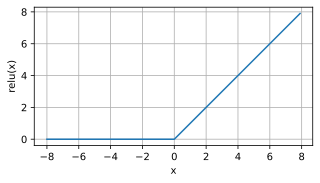

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

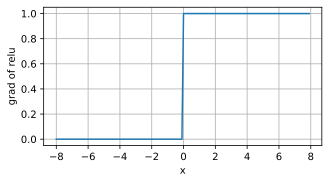

In [ ]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

$$\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x).$$

### 5.1.2.2. Sigmoid Function

$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

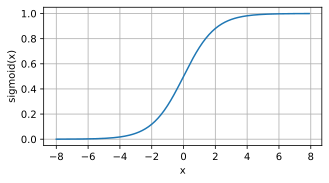

In [ ]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$


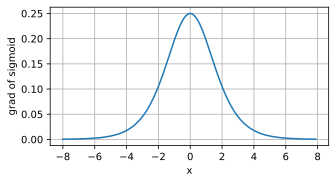

In [ ]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

### 5.1.2.3. Tanh Function

$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

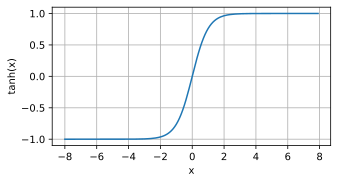

In [ ]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$


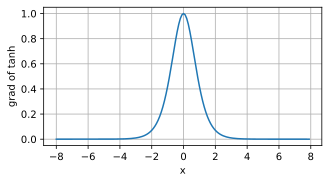

In [ ]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

## 5.2. Implementation of Multilayer Perceptrons

In [12]:
import torch
from torch import nn
from d2l import torch as d2l

### 5.2.1. Implementation from Scratch

### 5.2.1.1. Initializing Model Parameters

In [13]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

### 5.2.1.2. Model

In [14]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [15]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

### 5.2.1.3. Training

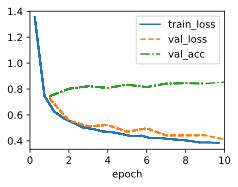

In [16]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 5.2.2. Concise Implementation

### 5.2.2.1. Model

In [17]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

### 5.2.2.2. Training

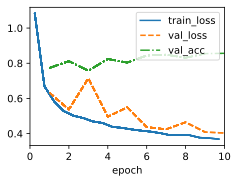

In [18]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

## 5.3. Forward Propagation, Backward Propagation, and Computational Graphs

### 5.3.1. Forward Propagation

*Forward propagation* (or *forward pass*) refers to the calculation and storage
of intermediate variables (including outputs)
for a neural network in order
from the input layer to the output layer.
We now work step-by-step through the mechanics
of a neural network with one hidden layer.
This may seem tedious but in the eternal words
of funk virtuoso James Brown,
you must "pay the cost to be the boss".


For the sake of simplicity, let's assume
that the input example is $\mathbf{x}\in \mathbb{R}^d$
and that our hidden layer does not include a bias term.
Here the intermediate variable is:

$$\mathbf{z}= \mathbf{W}^{(1)} \mathbf{x},$$

where $\mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$
is the weight parameter of the hidden layer.
After running the intermediate variable
$\mathbf{z}\in \mathbb{R}^h$ through the
activation function $\phi$
we obtain our hidden activation vector of length $h$:

$$\mathbf{h}= \phi (\mathbf{z}).$$

The hidden layer output $\mathbf{h}$
is also an intermediate variable.
Assuming that the parameters of the output layer
possess only a weight of
$\mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$,
we can obtain an output layer variable
with a vector of length $q$:

$$\mathbf{o}= \mathbf{W}^{(2)} \mathbf{h}.$$

Assuming that the loss function is $l$
and the example label is $y$,
we can then calculate the loss term
for a single data example,

$$L = l(\mathbf{o}, y).$$

As we will see the definition of $\ell_2$ regularization
to be introduced later,
given the hyperparameter $\lambda$,
the regularization term is

$$s = \frac{\lambda}{2} \left(\|\mathbf{W}^{(1)}\|_\textrm{F}^2 + \|\mathbf{W}^{(2)}\|_\textrm{F}^2\right),$$

where the Frobenius norm of the matrix
is simply the $\ell_2$ norm applied
after flattening the matrix into a vector.
Finally, the model's regularized loss
on a given data example is:

$$J = L + s.$$

We refer to $J$ as the *objective function*
in the following discussion.

### 5.3.2. Computational Graph of Forward Propagation

![Computational graph of forward propagation.](http://d2l.ai/_images/forward.svg)

### 5.3.3. Backpropagation

*Backpropagation* refers to the method of calculating
the gradient of neural network parameters.
In short, the method traverses the network in reverse order,
from the output to the input layer,
according to the *chain rule* from calculus.
The algorithm stores any intermediate variables
(partial derivatives)
required while calculating the gradient
with respect to some parameters.
Assume that we have functions
$\mathsf{Y}=f(\mathsf{X})$
and $\mathsf{Z}=g(\mathsf{Y})$,
in which the input and the output
$\mathsf{X}, \mathsf{Y}, \mathsf{Z}$
are tensors of arbitrary shapes.
By using the chain rule,
we can compute the derivative
of $\mathsf{Z}$ with respect to $\mathsf{X}$ via

$$\frac{\partial \mathsf{Z}}{\partial \mathsf{X}} = \textrm{prod}\left(\frac{\partial \mathsf{Z}}{\partial \mathsf{Y}}, \frac{\partial \mathsf{Y}}{\partial \mathsf{X}}\right).$$

Here we use the $\textrm{prod}$ operator
to multiply its arguments
after the necessary operations,
such as transposition and swapping input positions,
have been carried out.
For vectors, this is straightforward:
it is simply matrix--matrix multiplication.
For higher dimensional tensors,
we use the appropriate counterpart.
The operator $\textrm{prod}$ hides all the notational overhead.

Recall that
the parameters of the simple network with one hidden layer,
whose computational graph is in :numref:`fig_forward`,
are $\mathbf{W}^{(1)}$ and $\mathbf{W}^{(2)}$.
The objective of backpropagation is to
calculate the gradients $\partial J/\partial \mathbf{W}^{(1)}$
and $\partial J/\partial \mathbf{W}^{(2)}$.
To accomplish this, we apply the chain rule
and calculate, in turn, the gradient of
each intermediate variable and parameter.
The order of calculations are reversed
relative to those performed in forward propagation,
since we need to start with the outcome of the computational graph
and work our way towards the parameters.
The first step is to calculate the gradients
of the objective function $J=L+s$
with respect to the loss term $L$
and the regularization term $s$:

$$\frac{\partial J}{\partial L} = 1 \; \textrm{and} \; \frac{\partial J}{\partial s} = 1.$$

Next, we compute the gradient of the objective function
with respect to variable of the output layer $\mathbf{o}$
according to the chain rule:

$$
\frac{\partial J}{\partial \mathbf{o}}
= \textrm{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \mathbf{o}}\right)
= \frac{\partial L}{\partial \mathbf{o}}
\in \mathbb{R}^q.
$$

Next, we calculate the gradients
of the regularization term
with respect to both parameters:

$$\frac{\partial s}{\partial \mathbf{W}^{(1)}} = \lambda \mathbf{W}^{(1)}
\; \textrm{and} \;
\frac{\partial s}{\partial \mathbf{W}^{(2)}} = \lambda \mathbf{W}^{(2)}.$$

Now we are able to calculate the gradient
$\partial J/\partial \mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$
of the model parameters closest to the output layer.
Using the chain rule yields:

$$\frac{\partial J}{\partial \mathbf{W}^{(2)}}= \textrm{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}}\right) + \textrm{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}}\right)= \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^\top + \lambda \mathbf{W}^{(2)}.$$
:eqlabel:`eq_backprop-J-h`

To obtain the gradient with respect to $\mathbf{W}^{(1)}$
we need to continue backpropagation
along the output layer to the hidden layer.
The gradient with respect to the hidden layer output
$\partial J/\partial \mathbf{h} \in \mathbb{R}^h$ is given by


$$
\frac{\partial J}{\partial \mathbf{h}}
= \textrm{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{h}}\right)
= {\mathbf{W}^{(2)}}^\top \frac{\partial J}{\partial \mathbf{o}}.
$$

Since the activation function $\phi$ applies elementwise,
calculating the gradient $\partial J/\partial \mathbf{z} \in \mathbb{R}^h$
of the intermediate variable $\mathbf{z}$
requires that we use the elementwise multiplication operator,
which we denote by $\odot$:

$$
\frac{\partial J}{\partial \mathbf{z}}
= \textrm{prod}\left(\frac{\partial J}{\partial \mathbf{h}}, \frac{\partial \mathbf{h}}{\partial \mathbf{z}}\right)
= \frac{\partial J}{\partial \mathbf{h}} \odot \phi'\left(\mathbf{z}\right).
$$

Finally, we can obtain the gradient
$\partial J/\partial \mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$
of the model parameters closest to the input layer.
According to the chain rule, we get

$$
\frac{\partial J}{\partial \mathbf{W}^{(1)}}
= \textrm{prod}\left(\frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{W}^{(1)}}\right) + \textrm{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(1)}}\right)
= \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^\top + \lambda \mathbf{W}^{(1)}.
$$

### 5.3.4. Training Neural Networks

When training neural networks,
forward and backward propagation depend on each other.
In particular, for forward propagation,
we traverse the computational graph in the direction of dependencies
and compute all the variables on its path.
These are then used for backpropagation
where the compute order on the graph is reversed.

Take the aforementioned simple network as an illustrative example.
On the one hand,
computing the regularization term :eqref:`eq_forward-s`
during forward propagation
depends on the current values of model parameters $\mathbf{W}^{(1)}$ and $\mathbf{W}^{(2)}$.
They are given by the optimization algorithm according to backpropagation in the most recent iteration.
On the other hand,
the gradient calculation for the parameter
:eqref:`eq_backprop-J-h` during backpropagation
depends on the current value of the hidden layer output $\mathbf{h}$,
which is given by forward propagation.


Therefore when training neural networks, once model parameters are initialized,
we alternate forward propagation with backpropagation,
updating model parameters using gradients given by backpropagation.
Note that backpropagation reuses the stored intermediate values from forward propagation to avoid duplicate calculations.
One of the consequences is that we need to retain
the intermediate values until backpropagation is complete.
This is also one of the reasons why training
requires significantly more memory than plain prediction.
Besides, the size of such intermediate values is roughly
proportional to the number of network layers and the batch size.
Thus,
training deeper networks using larger batch sizes
more easily leads to *out-of-memory* errors.

# Discussions & Exercises

### 5.1. Discussion

**Limitations of Linear Models:**
Linear models assume monotonicity and fail in tasks with non-linear relationships (e.g., image classification).

**Hidden Layers in MLPs:**
Hidden layers allow MLPs to capture complex patterns by stacking affine transformations and applying nonlinear activation functions (e.g., ReLU).

**Activation Functions:**
- `ReLU`: Most common, sets negative inputs to 0. Simple and effective.
- `Sigmoid & Tanh`: Squeeze values but suffer from vanishing gradients. ReLU is often preferred for hidden layers.
Newer functions like GELU and Swish offer potential improvements in certain tasks.

**Universal Approximation:**
MLPs can approximate any function with enough hidden units, but deeper models are often more efficient.



---



Apart from *ReLU, Sigmoid, and Tanh*, several other activation functions exists in order to address the limitations of these traditional choices.
- Might offer alternatives for better performance in specific tasks.

**1. Leaky ReLU**
- Leaky ReLU is a variant of ReLU, which allows a small, non-zero gradient when the input is negative. This helps avoid "dead neurons" in the network.

$$\text{Leaky ReLU}(x) = \max(\alpha x, x)$$

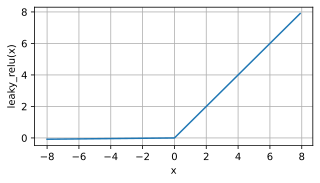

In [3]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.nn.functional.leaky_relu(x, negative_slope=0.01)
d2l.plot(x.detach(), y.detach(), 'x', 'leaky_relu(x)', figsize=(5, 2.5))

**2. GELU (Gaussian Error Linear Unit)**
- GELU applies a smoother transition between activation and inactivation compared to ReLU. It’s commonly used in transformer models.

$$\text{GELU}(x) = x \cdot \Phi(x)$$

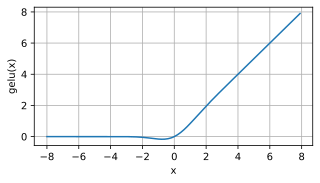

In [6]:
y = torch.nn.functional.gelu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'gelu(x)', figsize=(5, 2.5))

**3. Swish**
- Swish, like GELU, provides smooth, non-linear transformations. It is defined as:

$$\text{Swish}(x) = x \cdot \sigma(\beta x)$$

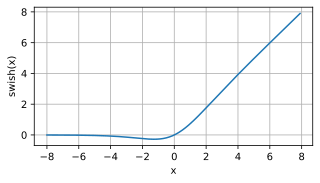

In [7]:
y = x * torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'swish(x)', figsize=(5, 2.5))

**4. ELU (Exponential Linear Unit)**
- ELU adds an exponential term for negative values, which helps improve gradient flow and avoid dead neurons.

$$\text{ELU}(x) =
\begin{cases}
x & \text{if } x > 0, \\
\alpha(e^x - 1) & \text{if } x \leq 0.
\end{cases}$$

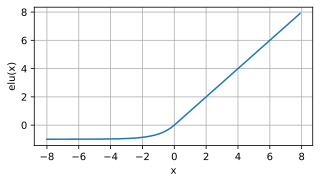

In [8]:
y = torch.nn.functional.elu(x, alpha=1.0)
d2l.plot(x.detach(), y.detach(), 'x', 'elu(x)', figsize=(5, 2.5))

### 5.1 Exercises & My Own Experiments

**I wonder what happens if I compare ReLU v/s Sigmoid v/s Tanh function?**

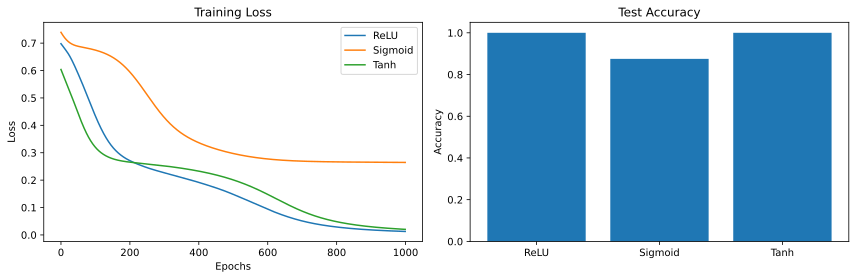

ReLU - Final Loss: 0.0127, Test Accuracy: 1.0000
Sigmoid - Final Loss: 0.2646, Test Accuracy: 0.8750
Tanh - Final Loss: 0.0203, Test Accuracy: 1.0000


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.activation = activation

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

def train_model(model, X_train, y_train, epochs=1000):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())

    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    return losses

def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_test).float().mean()
    return accuracy.item()

input_size = 2
hidden_size = 10
output_size = 2
epochs = 1000

activation_functions = {
    'ReLU': nn.ReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh()
}

results = {}

for name, activation in activation_functions.items():
    model = MLP(input_size, hidden_size, output_size, activation)
    losses = train_model(model, X_train, y_train, epochs)
    accuracy = evaluate_model(model, X_test, y_test)
    results[name] = {'losses': losses, 'accuracy': accuracy}

plt.figure(figsize=(12, 4))

plt.subplot(121)
for name, data in results.items():
    plt.plot(data['losses'], label=name)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
names = list(results.keys())
accuracies = [data['accuracy'] for data in results.values()]
plt.bar(names, accuracies)
plt.title('Test Accuracy')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

for name, data in results.items():
    print(f"{name} - Final Loss: {data['losses'][-1]:.4f}, Test Accuracy: {data['accuracy']:.4f}")

**ReLU and Tanh converged faster than Sigmoid, with ReLU slightly better in later epochs.**
- ReLU's success: Avoids vanishing gradients, allows sparse activations.
- Tanh's strong showing: Symmetry around zero beneficial for this dataset.
- Sigmoid's struggle: Suffers from vanishing gradients and non-zero-centered output.

### 5.2. Discussion


With experience in designing deep networks, **adding multiple layers becomes easier**, especially since we can *reuse* the training algorithms.

**MLP from scratch:**
- Initializes two sets of weights and biases for a simple MLP with one hidden layer.
- Uses a custom ReLU activation function.
- The forward pass reshapes the input, applies the ReLU activation to the hidden layer, and calculates the output.
- Training: The model is trained for 10 epochs using the d2l.Trainer and the Fashion-MNIST dataset.

In [ ]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

**Concise MLP with PyTorch's API:**
- Uses PyTorch’s nn.Sequential to build the model, making it simpler and more flexible.
- Includes layers for flattening the input, applying a hidden layer with ReLU, and outputting predictions.
- Training: The same d2l.Trainer is used to fit this model with the Fashion-MNIST data.

In [ ]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

### 5.2 Exercises & My Own Experiment

**MLP from scratch** v/s **Concise MLP with PyTorch's API**??

MLPScratch - Final test accuracy: 0.8077
MLP - Final test accuracy: 0.8443


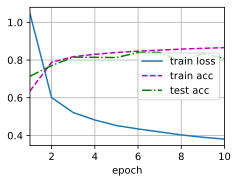

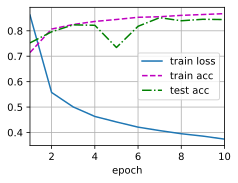

In [21]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from d2l import torch as d2l

class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

    def forward(self, X):
        X = X.reshape((-1, self.num_inputs))
        H = torch.relu(torch.matmul(X, self.W1) + self.b1)
        return torch.matmul(H, self.W2) + self.b2

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=self.lr)

class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

    def forward(self, X):
        return self.net(X)

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=self.lr)

def load_data_fashion_mnist(batch_size, resize=None):
    trans = [torchvision.transforms.ToTensor()]
    if resize:
        trans.insert(0, torchvision.transforms.Resize(resize))
    trans = torchvision.transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (DataLoader(mnist_train, batch_size, shuffle=True,
                       num_workers=4),
            DataLoader(mnist_test, batch_size, shuffle=False,
                       num_workers=4))

def accuracy(y_hat, y):
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

def train_epoch(model, train_iter, loss, optimizer):
    model.train()
    metric = d2l.Accumulator(3)
    for X, y in train_iter:
        y_hat = model(X)
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        metric.add(float(l) * X.shape[0], accuracy(y_hat, y), X.shape[0])
    return metric[0] / metric[2], metric[1] / metric[2]

def evaluate_accuracy(model, data_iter):
    model.eval()
    metric = d2l.Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(model(X), y), y.numel())
    return metric[0] / metric[1]

def train(model, train_iter, test_iter, loss, num_epochs):
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    optimizer = model.configure_optimizers()
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_iter, loss, optimizer)
        test_acc = evaluate_accuracy(model, test_iter)
        animator.add(epoch + 1, (train_loss, train_acc, test_acc))
    return animator

batch_size, num_epochs = 256, 10
num_inputs, num_outputs, num_hiddens = 784, 10, 256
lr = 0.1
train_iter, test_iter = load_data_fashion_mnist(batch_size)
loss = nn.CrossEntropyLoss()
model_scratch = MLPScratch(num_inputs, num_outputs, num_hiddens, lr)
animator_scratch = train(model_scratch, train_iter, test_iter, loss, num_epochs)
model = MLP(num_outputs, num_hiddens, lr)
animator = train(model, train_iter, test_iter, loss, num_epochs)


print(f"MLPScratch - Final test accuracy: {animator_scratch.Y[2][-1]:.4f}")
print(f"MLP - Final test accuracy: {animator.Y[2][-1]:.4f}")
d2l.plt.show()

**MLP using d2l is slightly better than MLP from scratch, and its even easier to code!**

### 5.3. Discussion

**Forward propagation** sequentially calculates and stores intermediate variables within the computational graph defined by the neural network. It proceeds from the input to the output layer.

**Backpropagation** sequentially calculates and stores the gradients of intermediate variables and parameters within the neural network in the reversed order.

When training deep learning models, forward propagation and backpropagation are interdependent,
and training requires significantly more memory than prediction.

### 5.3 Exercises & My Own Experiments

What **if forward & backward propagation didn't exist**?
I reused code from 5.2 exercises & experiment:

MLPScratch - Final test accuracy: 0.0951
MLP - Final test accuracy: 0.1015


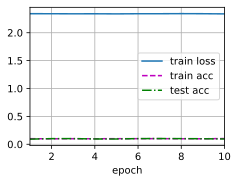

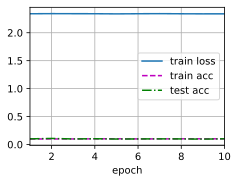

In [28]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from d2l import torch as d2l

class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

    def forward(self, X):
        # returns random values rather than forward propagation!!
        return torch.rand(X.shape[0], self.num_outputs)

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=self.lr)

class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

    def forward(self, X):
        # returns random values rather than forward propagation!!
        return torch.rand(X.shape[0], self.num_outputs)

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=self.lr)

def load_data_fashion_mnist(batch_size, resize=None):
    trans = [torchvision.transforms.ToTensor()]
    if resize:
        trans.insert(0, torchvision.transforms.Resize(resize))
    trans = torchvision.transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (DataLoader(mnist_train, batch_size, shuffle=True,
                       num_workers=4),
            DataLoader(mnist_test, batch_size, shuffle=False,
                       num_workers=4))

def accuracy(y_hat, y):
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

def train_epoch(model, train_iter, loss, optimizer):
    model.train()
    metric = d2l.Accumulator(3)
    for X, y in train_iter:
        y_hat = model(X)
        l = loss(y_hat, y)
        # removed back propagation!!
        metric.add(float(l) * X.shape[0], accuracy(y_hat, y), X.shape[0])
    return metric[0] / metric[2], metric[1] / metric[2]

def evaluate_accuracy(model, data_iter):
    model.eval()
    metric = d2l.Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(model(X), y), y.numel())
    return metric[0] / metric[1]

def train(model, train_iter, test_iter, loss, num_epochs):
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    optimizer = model.configure_optimizers()
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_iter, loss, optimizer)
        test_acc = evaluate_accuracy(model, test_iter)
        animator.add(epoch + 1, (train_loss, train_acc, test_acc))
    return animator

batch_size, num_epochs = 256, 10
num_inputs, num_outputs, num_hiddens = 784, 10, 256
lr = 0.1
train_iter, test_iter = load_data_fashion_mnist(batch_size)
loss = nn.CrossEntropyLoss()
model_scratch = MLPScratch(num_inputs, num_outputs, num_hiddens, lr)
animator_scratch = train(model_scratch, train_iter, test_iter, loss, num_epochs)
model = MLP(num_outputs, num_hiddens, lr)
animator = train(model, train_iter, test_iter, loss, num_epochs)

print(f"MLPScratch - Final test accuracy: {animator_scratch.Y[2][-1]:.4f}")
print(f"MLP - Final test accuracy: {animator.Y[2][-1]:.4f}")
d2l.plt.show()

By this experiment, I learned that if front & back propagation doesn't exist, the model basically can't learn anything! Front & back propagation are **CRUCIAL** for MLP!